In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load data
train_path = "train_FD001.txt"
test_path = "test_FD001.txt"
rul_path = "RUL_FD001.txt"

# Set fixed column names
column_names = ['unit', 'time'] + [f'sensor_{i}' for i in range(1, 22)]

# Read data files
train_data = pd.read_csv(train_path, sep=" ", header=None, names=column_names, engine='python')
test_data = pd.read_csv(test_path, sep=" ", header=None, names=column_names, engine='python')
rul_data = pd.read_csv(rul_path, header=None, names=['RUL'])

# Display the first few rows of the data to check its structure
print(train_data.head())
print(test_data.head())


                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_12  sensor_13  sensor_14  sensor_15

In [31]:
# Clean data (remove empty columns)
train_data.dropna(axis=1, how='all', inplace=True)
test_data.dropna(axis=1, how='all', inplace=True)

# Display cleaned data
print(train_data.head())


                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_10  sensor_11  sensor_12  sensor_13

In [32]:
# Calculate Remaining Useful Life (RUL)
train_data['RUL'] = train_data.groupby('unit')['time'].transform(lambda x: x.max() - x)

# Display the first few rows to check if RUL is calculated correctly
print(train_data.head())


                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_11  sensor_12  sensor_13  sensor_14

---

## **2️ Feature Engineering**
📌 **Goal**: Build a dataset suitable for machine learning  

🔹 **Steps**
1. **Moving Average Features** (Smooth using a 5-time step window)  
2. **Standardize Sensor Data**  

📌 **Code**


In [33]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())


unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
RUL          0
dtype: int64
unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
dtype: int64


In [34]:
# Fill missing values
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


In [35]:
from sklearn.preprocessing import StandardScaler

# Generate moving average features
for sensor in [f'sensor_{i}' for i in range(1, 20)]:
    train_data[sensor + '_mean'] = train_data[sensor].rolling(5).mean()

# Standardization
scaler = StandardScaler()
sensor_features = [f'sensor_{i}' for i in range(1, 20)]
train_data[sensor_features] = scaler.fit_transform(train_data[sensor_features])


---

## **3️-1 Random Forest (Machine Learning Model)**
📌 **Goal**: Use **Random Forest** to predict RUL  

🔹 **Steps**
1. Create `RandomForestRegressor`  
2. Train the model  
3. Evaluate the model (MSE, RMSE, R²)  

📌 **Code**


In [36]:
# Select sensor features as X (input)
sensor_features = [f'sensor_{i}' for i in range(1, 20)] + [f'sensor_{i}_mean' for i in range(1, 20)]
X = train_data[sensor_features]

# Set y (target label, RUL)
y = train_data.groupby('unit')['time'].transform(max) - train_data['time']


In [37]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (16504, 38), Testing set size: (4127, 38)


In [38]:
print(X_train.isnull().sum().sum())  # Count total NaN values
print(X_test.isnull().sum().sum())


38
38


In [39]:
# Fill NaN values with mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model training complete!")


Random Forest model training complete!


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R² (R-squared)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model MSE: {mse}")
print(f"Random Forest Model RMSE: {rmse}")
print(f"Random Forest Model R²: {r2}")


Random Forest Model MSE: 0.09723922108068744
Random Forest Model RMSE: 0.3118320398558933
Random Forest Model R²: 0.6106563464316525


---

## **3️-2 XGBoost (Machine Learning Model)**
📌 **Goal**: Use **XGBoost** to predict RUL  

🔹 **Steps**
1. Create `XGBRegressor`
2. Train the model
3. Evaluate the model (MSE, RMSE, R²)

📌 **Code**


In [42]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import json

# Ensure the data format is correct
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# 1. Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7, 9], 
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0] 
}

# 2. Create the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Perform hyperparameter tuning using Randomized Search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Increase the number of search iterations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42  # Ensure reproducibility
)

# 4. Train the model (Ensure X_train, y_train are correctly formatted)
random_search.fit(X_train, y_train)

# 5. Retrieve the best hyperparameters
best_params = random_search.best_params_
print("Best Parameters:", json.dumps(best_params, indent=4))

# 6. Train XGBoost with the best parameters
best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# 7. Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)

# 8. Compute MSE, RMSE, and R²
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Tuned MSE: {mse_xgb:.6f}")
print(f"XGBoost Tuned RMSE: {rmse_xgb:.6f}")
print(f"XGBoost Tuned R²: {r2_xgb:.6f}")


Best Parameters: {
    "subsample": 0.8,
    "n_estimators": 100,
    "max_depth": 3,
    "learning_rate": 0.05,
    "colsample_bytree": 0.6
}
XGBoost Tuned MSE: 0.095687
XGBoost Tuned RMSE: 0.309333
XGBoost Tuned R²: 0.616873


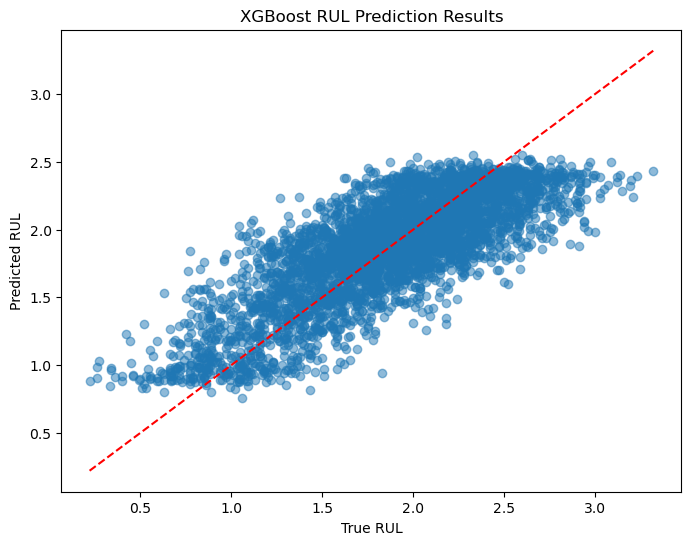

In [43]:
import matplotlib.pyplot as plt

# Predict using the trained XGBoost model
y_pred = best_xgb.predict(X_test)

# Create a scatter plot to compare true vs. predicted RUL
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Plot the ideal case (where predictions perfectly match actual values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")

# Labels and title
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("XGBoost RUL Prediction Results")

# Show the plot
plt.show()


# ---
# 
# ## **4️ CNN (Deep Learning Model)**
# 📌 **Goal**: Use **CNN** to predict RUL  
# 
# 🔹 **Steps**  
# 1. Design the CNN architecture  
# 2. Train the model  
# 3. Evaluate the model  
# 
# 📌 **Code (TensorFlow/Keras)**


In [44]:
# CNN Data Preprocessing - Sliding Window Method
import numpy as np

def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    # Ensure y indices are continuous
    y = y.reset_index(drop=True) if hasattr(y, "reset_index") else y
    for i in range(len(X) - time_steps):
        X_seq.append(X[i: i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

time_steps = 10  # Window size
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Ensure the input shape is correct (samples, time steps, features)
print(X_train_seq.shape, X_test_seq.shape)  # (samples, 10, number of features)


(16494, 10, 38) (4117, 10, 38)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [46]:
# CNN Model Architecture
# Define the CNN model

model = Sequential([
    Conv1D(256, kernel_size=5, activation='relu', padding='same', input_shape=(time_steps, X_train_seq.shape[2])),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Display model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 10, 256)        │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 10, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 10, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,337 (1.00 MB)

 Trainable params: 262,337 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#CNN
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50, batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 11018.9473 - mae: 34.5699 - val_loss: 0.6700 - val_mae: 0.6464
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.1041 - mae: 1.7739 - val_loss: 28.2557 - val_mae: 5.2687
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18.5011 - mae: 3.4056 - val_loss: 0.9252 - val_mae: 0.8075
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 20.1178 - mae: 3.3469 - val_loss: 16.7611 - val_mae: 4.0489
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14.3985 - mae: 3.0343 - val_loss: 1.9298 - val_mae: 1.2724
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 222.2718 - mae: 3.5056 - val_loss: 0.3929 - val_mae: 0.5156
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3994 - mae: 0.5082 - val_loss: 0.6231 - val_mae: 0.6710
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5272 - mae: 0.5778 - val_loss: 0.2787 - val_mae: 0.4239
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5

In [48]:
# Predict the test set
y_pred_cnn = model.predict(X_test_seq)

# Calculate MSE, RMSE, R²
mse_cnn = mean_squared_error(y_test_seq, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test_seq, y_pred_cnn)

# Output results
print(f"CNN Model MSE: {mse_cnn}")
print(f"CNN Model RMSE: {rmse_cnn}")
print(f"CNN Model R²: {r2_cnn}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CNN Model MSE: 0.2615990686609504
CNN Model RMSE: 0.5114675636449983
CNN Model R²: -0.04753316635253402


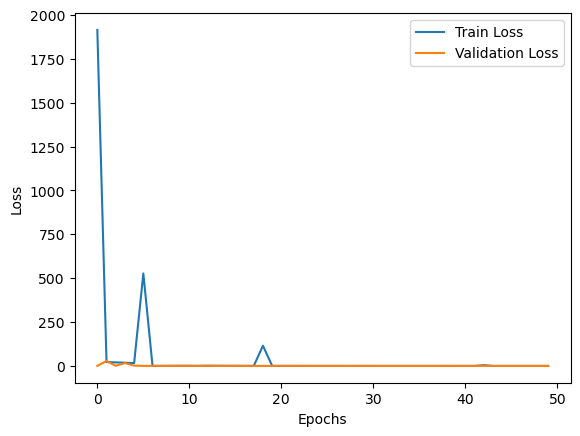

In [49]:
#Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


"""
## 5️ Model Deployment
📌 Objective: Deploy the model using FastAPI

📌 Code:
"""


In [50]:
import joblib


joblib.dump(best_xgb, "xgboost_rul_model.pkl")


['xgboost_rul_model.pkl']

In [51]:
print(X_train.shape) 


(16504, 38)


In [52]:
print(X_train[:5]) 


[[ 5.00540443e-02 -3.01518345e-01 -1.77635684e-15  1.41683329e-01
  -5.17146434e-01  8.92434560e-01 -5.23175463e-01  0.00000000e+00
  -4.16233936e-01  1.57999142e-01  1.92549393e-01 -5.57395771e-01
  -2.86517303e-01 -1.38777878e-17  5.09674655e-01  0.00000000e+00
   0.00000000e+00  2.97270835e-01  3.72242865e-01  1.59223800e+03
   1.40968800e+03  1.46200000e+01  2.16100000e+01  5.53136000e+02
   2.38813600e+03  9.05171000e+03  1.30000000e+00  4.74460000e+01
   5.21380000e+02  2.38811600e+03  8.13085200e+03  8.43898000e+00
   3.00000000e-02  3.93400000e+02  2.38800000e+03  1.00000000e+02
   3.88080000e+01  2.33112800e+01]
 [ 5.27953173e-01 -4.48178711e-01 -1.77635684e-15  1.41683329e-01
   1.05334938e+00 -1.22072489e+00  6.10762113e-01  0.00000000e+00
  -4.53675772e-01  1.82571544e+00 -9.19841389e-01  5.83321709e-01
  -1.63570208e+00 -1.38777878e-17 -2.07309423e+00  0.00000000e+00
   0.00000000e+00  1.31288428e-01  3.41757384e-01  1.58768200e+03
   1.39916600e+03  1.46200000e+01  2.1610

In [53]:
from fastapi import FastAPI
import joblib
import numpy as np
from pydantic import BaseModel

# Initialize FastAPI application
app = FastAPI()

# Load the pre-trained XGBoost model
try:
    model = joblib.load("xgboost_rul_model.pkl")
    print("✅ XGBoost model successfully loaded")
except Exception as e:
    print(f"❌ Failed to load model: {e}")

# Define input data format
class RULInput(BaseModel):
    features: list[float]  # Input feature data (must match the training format)

# Define API route
@app.post("/predict/")
async def predict_rul(data: RULInput):
    try:
        # Check the length of the input data
        if len(data.features) != 38:
            return {"error": "Incorrect number of input features. Expected 38 values."}
            
        # Convert input data to a NumPy array
        input_data = np.array(data.features).reshape(1, -1)
        
        # Make prediction
        prediction = model.predict(input_data)[0]
        
        return {"predicted_RUL": prediction}
    except Exception as e:
        return {"error": str(e)}


✅ XGBoost model successfully loaded
